If we use constant parallax bin width, the graph is not very smooth.

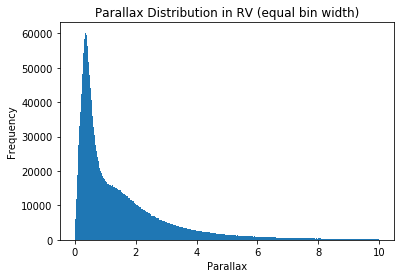

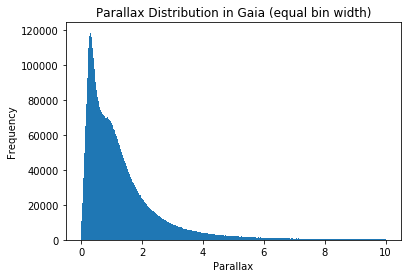

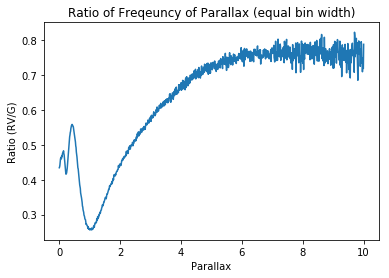

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

# get data from fits file
data_g = Table.read("gaia_data_with_straight_cutoff.fits")
data_rv = Table.read("gaia_rv_with_straight_cutoff.fits")

# get rid of stars with negative parallax
mask_g = data_g["parallax"]>0
data_g = data_g[mask_g]
mask_rv = data_rv["parallax"]>0
data_rv = data_rv[mask_rv]

# get parallax
parallax_g = data_g["parallax"]
parallax_rv = data_rv["parallax"]

#set up min and max
parallax_min = min(np.min(parallax_g), np.min(parallax_rv))
parallax_max = min(max(np.max(parallax_g), np.max(parallax_rv)),10)

bins = 1000

#plot rv paralax distribution
plt.figure()
hist_parallax_rv, edges_rv, patches_rv = plt.hist(
        parallax_rv, range = (parallax_min, parallax_max), bins = bins)
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.title("Parallax Distribution in RV (equal bin width)")
plt.savefig("Parallax Distribution in RV (equal bin width).png")

#plot gaia paralax distribution
plt.figure()
hist_parallax_g, edges_g, patches_g = plt.hist(
        parallax_g, range = (parallax_min, parallax_max), bins = bins)
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.title("Parallax Distribution in Gaia (equal bin width)")
plt.savefig("Parallax Distribution in Gaia (equal bin width).png")

#plot ratio
plt.figure()
plt.plot(np.linspace(parallax_min, parallax_max, bins), hist_parallax_rv/hist_parallax_g)
plt.xlabel('Parallax')
plt.ylabel('Ratio (RV/G)')
plt.title("Ratio of Freqeuncy of Parallax (equal bin width)")
plt.savefig("Ratio of Freqeuncy of Parallax (equal bin width).png")
plt.show()

The following code plots the bins with constant distance width. Need to cut out stars with distance >30 kpc, otherwise takes too long.

KeyboardInterrupt: 

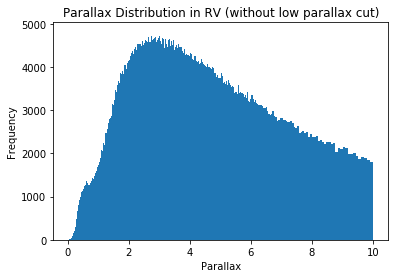

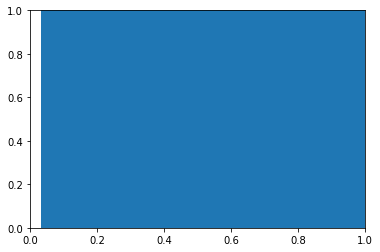

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

# get data from fits file
data_g = Table.read("gaia_data_with_straight_cutoff.fits")
data_rv = Table.read("gaia_rv_with_straight_cutoff.fits")

# get rid of stars with negative parallax and stars further than 10 kpc
mask_g = np.all(np.array([data_g["parallax"]>0, 1/data_g["parallax"]<10]),axis = 0)
data_g = data_g[mask_g]
mask_rv = np.all(np.array([data_rv["parallax"]>0, 1/data_rv["parallax"]<10]),axis = 0)
data_rv = data_rv[mask_rv]

# get parallax
parallax_g = data_g["parallax"]
parallax_rv = data_rv["parallax"]

#set up min and max
parallax_min = min(np.min(parallax_g), np.min(parallax_rv))
parallax_max = min(max(np.max(parallax_g), np.max(parallax_rv)),10)
#set up a list of even bins of 0.01 kpc in distance space, convert to uneven
#parralax bins
distance_pixel = 0.001
bins = np.flip(1/np.arange(1/parallax_max,1/parallax_min + distance_pixel, distance_pixel), axis =0)

#plot rv paralax distribution
plt.figure()
hist_parallax_rv, edges_rv, patches_rv = plt.hist(
        parallax_rv, range = (parallax_min, parallax_max), bins = bins)
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.title("Parallax Distribution in RV (without low parallax cut)")
plt.savefig("Parallax Distribution in RV (without low parallax cut).png")

#plot gaia paralax distribution
plt.figure()
hist_parallax_g, edges_g, patches_g = plt.hist(
        parallax_g, range = (parallax_min, parallax_max), bins = bins)
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.title("Parallax Distribution in Gaia (without low parallax cut)")
plt.savefig("Parallax Distribution in Gaia (without low parallax cut).png")

#plot ratio
plt.figure()
bins_adjusted = np.flip(1/np.arange(1/parallax_max,1/parallax_min, distance_pixel), axis =0)
plt.plot(bins_adjusted, hist_parallax_rv/hist_parallax_g)
plt.xlabel('Parallax')
plt.ylabel('Ratio (RV/G)')
plt.title("Ratio of Freqeuncy of Parallax (without low parallax cut)")
plt.savefig("Ratio of Freqeuncy of Parallax (without low parallax cut).png")
plt.show()

Same bin width, but without cut of parallax > 10. Shows why we can stop at parallax = 10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

# get data from fits file
data_g = Table.read("gaia_data_with_straight_cutoff.fits")
data_rv = Table.read("gaia_rv_with_straight_cutoff.fits")

# get rid of stars with negative parallax and stars further than 30 kpc
mask_g = np.all(np.array([data_g["parallax"]>0, 1/data_g["parallax"]<30]),axis = 0)
data_g = data_g[mask_g]
mask_rv = np.all(np.array([data_rv["parallax"]>0, 1/data_rv["parallax"]<30]),axis = 0)
data_rv = data_rv[mask_rv]

# get parallax
parallax_g = data_g["parallax"]
parallax_rv = data_rv["parallax"]

#set up min and max
parallax_min = min(np.min(parallax_g), np.min(parallax_rv))
parallax_max = max(np.max(parallax_g), np.max(parallax_rv))
#set up a list of even bins of 0.01 kpc in distance space, convert to uneven
#parralax bins
distance_pixel = 0.001
bins = np.flip(1/np.arange(1/parallax_max,1/parallax_min + distance_pixel, distance_pixel), axis =0)

#plot rv paralax distribution
plt.figure()
hist_parallax_rv, edges_rv, patches_rv = plt.hist(
        parallax_rv, range = (parallax_min, parallax_max), bins = bins)
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.title("Parallax Distribution in RV (without large parallax cut)")
plt.savefig("Parallax Distribution in RV (without large parallax cut).png")

#plot gaia paralax distribution
plt.figure()
hist_parallax_g, edges_g, patches_g = plt.hist(
        parallax_g, range = (parallax_min, parallax_max), bins = bins)
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.title("Parallax Distribution in Gaia (without large parallax cut)")
plt.savefig("Parallax Distribution in Gaia (without large parallax cut).png")

#plot ratio
plt.figure()
bins_adjusted = np.flip(1/np.arange(1/parallax_max,1/parallax_min, distance_pixel), axis =0)
plt.plot(bins_adjusted, hist_parallax_rv/hist_parallax_g)
plt.xlabel('Parallax')
plt.ylabel('Ratio (RV/G)')
plt.title("Ratio of Freqeuncy of Parallax (without large parallax cut)")
plt.savefig("Ratio of Freqeuncy of Parallax (without large parallax cut).png")

Final version. Cut for 1<parallax<10.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

# get data from fits file
data_g = Table.read("gaia_data_with_straight_cutoff.fits")
data_rv = Table.read("gaia_rv_with_straight_cutoff.fits")

# get rid of stars with negative parallax and stars further than 1 kpc
mask_g = np.all(np.array([data_g["parallax"]>0, 1/data_g["parallax"]<1]),axis = 0)
data_g = data_g[mask_g]
mask_rv = np.all(np.array([data_rv["parallax"]>0, 1/data_rv["parallax"]<1]),axis = 0)
data_rv = data_rv[mask_rv]

# get parallax
parallax_g = data_g["parallax"]
parallax_rv = data_rv["parallax"]

#set up min and max
parallax_min = 1
parallax_max = 10
#set up a list of even bins of 0.01 kpc in distance space, convert to uneven
#parralax bins
distance_pixel = 0.001
bins = np.flip(1/np.arange(1/parallax_max,1/parallax_min + distance_pixel, distance_pixel), axis =0)

#plot rv paralax distribution
plt.figure()
hist_parallax_rv, edges_rv, patches_rv = plt.hist(
        parallax_rv, range = (parallax_min, parallax_max), bins = bins)
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.title("Parallax Distribution in RV")
plt.savefig("Parallax Distribution in RV.png")

#plot gaia paralax distribution
plt.figure()
hist_parallax_g, edges_g, patches_g = plt.hist(
        parallax_g, range = (parallax_min, parallax_max), bins = bins)
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.title("Parallax Distribution in Gaia")
plt.savefig("Parallax Distribution in Gaia.png")

#plot ratio
plt.figure()
bins_adjusted = np.flip(1/np.arange(1/parallax_max,1/parallax_min, distance_pixel), axis =0)
plt.plot(bins_adjusted, hist_parallax_rv/hist_parallax_g)
plt.xlabel('Parallax')
plt.ylabel('Ratio (RV/G)')
plt.title("Ratio of Freqeuncy of Parallax")
plt.savefig("Ratio of Freqeuncy of Parallax.png")